In [19]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Callable, Optional
from numpy.typing import NDArray

from sklearn import gaussian_process as gp


In [7]:
def static_nl(alphas:Optional[List[np.float64]]=None) -> Callable[[np.float64], np.float64]:
    if not alphas:
        k = 5
        alphas = np.random.normal(0,1,(k,1))
    else:
        k = len(alphas)

    def y(u:np.float64):
        return np.sum([alpha*u**k for k, alpha in enumerate(alphas)])
    
    return y


In [18]:
alphas = [0,0,0,1]
y = static_nl(alphas)
y(2)


8

(100, 1)


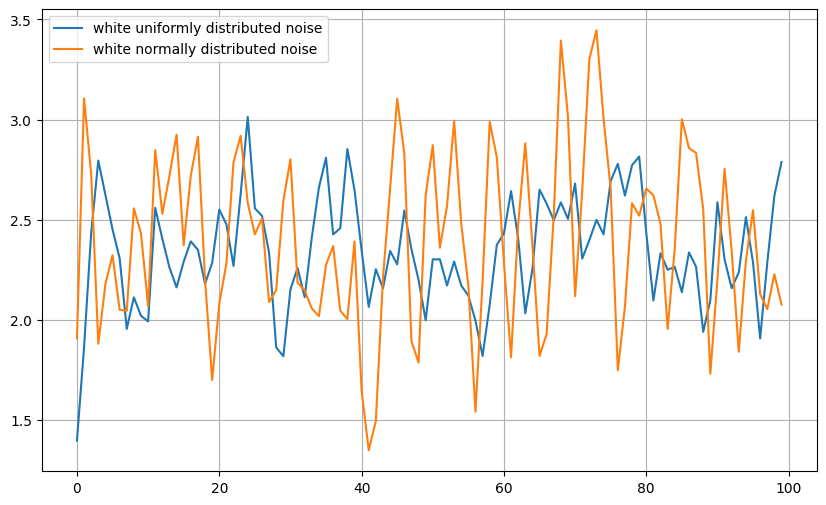

In [30]:
N, dt = 100, 1
K = gp.kernels.RBF()
x = np.linspace(0, (N-1)*dt, num=N).reshape(-1,1)
print(x.shape)
Kx = K(x)
L = np.linalg.cholesky(Kx)

# white uniformly distributed noise
u = np.random.uniform(1,2, size=(N,1))
u_w = L@u

# white normally distributed noise
u = np.random.normal(1.5,1/2,size=(N,1))
u_n = L@u

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,u_w, label='white uniformly distributed noise')
ax.plot(x,u_n, label='white normally distributed noise')
ax.grid()
ax.legend()


Results for N = 4000
Uniform: g_19 = 2.6411, g_21 = 6.8913
Normal:  g_19 = 2.6612, g_21 = 6.9483

Results for N = 40000
Uniform: g_19 = 2.6590, g_21 = 6.9035
Normal:  g_19 = 2.6549, g_21 = 6.9767


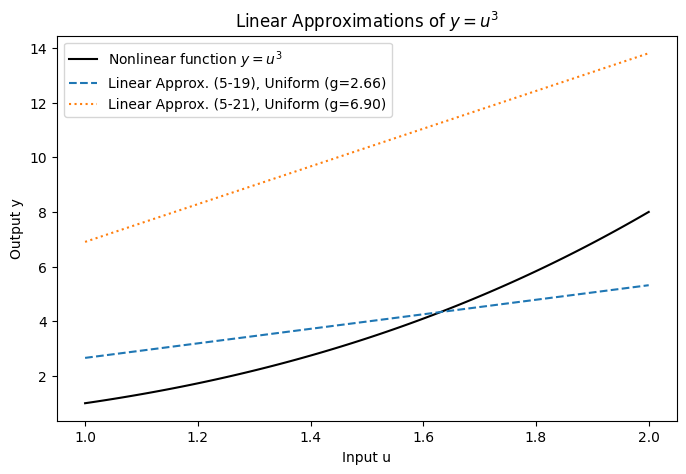

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute g* for (5-19) and (5-21)
def compute_g_star(u_samples):
    y_samples = u_samples**3
    
    E_u2 = np.mean(u_samples**2)
    E_u3 = np.mean(u_samples**3)
    E_u4 = np.mean(u_samples**4)
    
    g_19 = E_u4 / E_u2  # From (5-19)
    
    E_u = np.mean(u_samples)
    E_y = np.mean(y_samples)
    
    u_tilde = u_samples - E_u
    y_tilde = y_samples - E_y
    
    g_21 = np.mean(u_tilde * y_tilde) / np.mean(u_tilde**2)  # From (5-21)
    
    return g_19, g_21

# Function to simulate and compute results
def run_simulation(N):
    # Uniform Distribution U[1,2]
    u_uniform = np.random.uniform(1, 2, N)
    g_19_uniform, g_21_uniform = compute_g_star(u_uniform)
    
    # Normal Distribution N(1.5, sqrt(1/12))
    u_normal = np.random.normal(1.5, np.sqrt(1/12), N)
    g_19_normal, g_21_normal = compute_g_star(u_normal)
    
    return (g_19_uniform, g_21_uniform), (g_19_normal, g_21_normal)

# Run for N = 4000 and N = 40000
results_4000 = run_simulation(4000)
results_40000 = run_simulation(40000)

# Display results
print("Results for N = 4000")
print(f"Uniform: g_19 = {results_4000[0][0]:.4f}, g_21 = {results_4000[0][1]:.4f}")
print(f"Normal:  g_19 = {results_4000[1][0]:.4f}, g_21 = {results_4000[1][1]:.4f}")

print("\nResults for N = 40000")
print(f"Uniform: g_19 = {results_40000[0][0]:.4f}, g_21 = {results_40000[0][1]:.4f}")
print(f"Normal:  g_19 = {results_40000[1][0]:.4f}, g_21 = {results_40000[1][1]:.4f}")

# Plot nonlinear function and linear approximations
u_vals = np.linspace(1, 2, 100)
y_vals = u_vals**3

plt.figure(figsize=(8, 5))
plt.plot(u_vals, y_vals, label='Nonlinear function $y = u^3$', color='black')
plt.plot(u_vals, results_40000[0][0] * u_vals, label=f'Linear Approx. (5-19), Uniform (g={results_40000[0][0]:.2f})', linestyle='dashed')
plt.plot(u_vals, results_40000[0][1] * u_vals, label=f'Linear Approx. (5-21), Uniform (g={results_40000[0][1]:.2f})', linestyle='dotted')
plt.legend()
plt.xlabel("Input u")
plt.ylabel("Output y")
plt.title("Linear Approximations of $y = u^3$")
plt.show()

[-0.37726892 -0.31136554 -0.31136554]


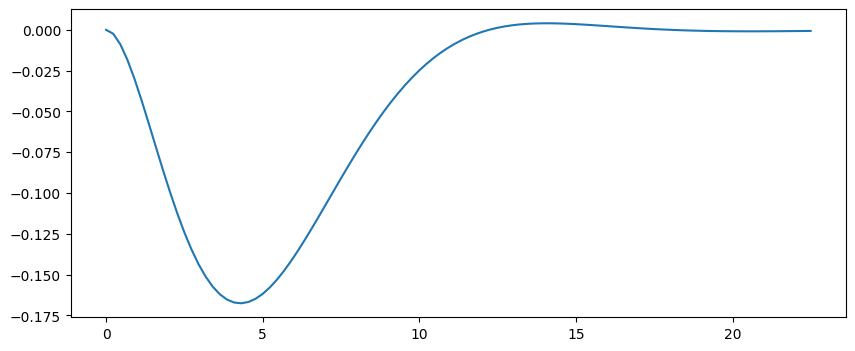

In [ ]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
A = np.array([
    [0, 1, 0],
    [0,0,1],
    [-0.1, -0.5, -1]
])
# A = np.array([
#     [0, 1,],
#     [-0.1, -0.5]
# ])
# A = np.array([[-0.5]])
B = np.array([
    [1],
    [0],
    [0]
])
# B = np.array([
#     [1],
#     [0]
# ])
# B = np.array([[1]])
C = np.array([
    [0,0,1]
])
# C = np.array([
#     [0,1]
# ])
# C = np.array([[1]])
D = np.array([[0]])
nx = A.shape[0]

print(np.real(np.linalg.eig(A)[0]))


t, y = sig.step((A,B,C,D))
fig, ax = plt.subplots(figsize=(10,4))
# t = np.linspace(0,5,100)
# ax.plot(t, np.exp(-t)-1)
ax.plot(t,y)




In [51]:
def discretize(A,B,C,D,dt, approximate=False):
    nx = A.shape[0]
    if approximate:
        Ad = np.eye(nx)+A*dt
        Bd = B*dt
    else:
        Ad = np.exp(A*dt)
        Bd = np.linalg.inv(A) @ (Ad - np.eye(nx)) @ B
    Cd = C
    Dd = D

    return Ad,Bd,Cd,Dd




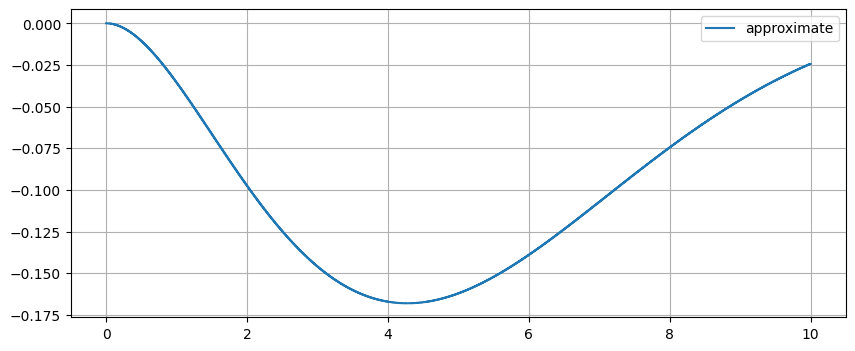

In [64]:
dt = 0.01
# Ad, Bd, Cd, Dd = discretize(A,B,C,D, dt)
# t, y = sig.dstep((Ad,Bd,Cd,Dd,dt), t=[0,10])
Ad, Bd, Cd, Dd = discretize(A,B,C,D, dt, approximate=True)
t, ya = sig.dstep((Ad,Bd,Cd,Dd,dt), t=[0,10])

fig, ax = plt.subplots(figsize=(10,4))
# ax.plot(t, y[0], label='exact')
ax.step(t,ya[0], label='approximate')
ax.grid()
ax.legend()